In [3]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv(r"C:\Data sciences all Important file\my project dataset\Fake news\train.csv")

In [5]:
data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [16]:
data.shape

(20800, 5)

In [17]:
data.drop(["label"],axis=1,inplace=True)

In [18]:
data=data.dropna()

In [19]:
data.shape

(18285, 4)

In [20]:
data.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [22]:
data.reset_index(inplace=True)

In [23]:
data=pd.DataFrame(data.text)

In [24]:
data.head()

,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...
4,Print \nAn Iranian woman has been sentenced to...


##  Data Cleaning or Pre-Processing

# Step 1 :- Lower case


In [25]:
data.text=data.text.str.lower()

In [33]:
data.iloc[0]

text    house dem aide: we didn’t even see comey’s let...
Name: 0, dtype: object

# Remove url

In [34]:
data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False) # | = or
data.iloc[991,0]

'the white house, concerned about the possible political repercussions of the republican effort to defund planned parenthood, has proposed preserving federal payments to the group if it discontinues providing abortions. the proposal, which was never made formally, has been rejected as an impossibility by officials at planned parenthood, which receives about $500 million annually in federal funding. that money helps pay for women’s health services the organization provides, not for abortion services. “let’s be clear: federal funds already do not pay for abortions,” dawn laguens, the executive vice president of the planned parenthood federation of america, said on monday. “offering money to planned parenthood to abandon our patients and our values is not a deal that we will ever accept. providing critical health care services for millions of american women is nonnegotiable. ” but the outreach to allies of planned parenthood is a glimpse of the internal struggle inside a white house torn 

# Step 2 :- Punctuation


In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [41]:
data.text=data.text.apply(lambda x : remove_punctuation(x))

In [42]:
data.iloc[991,0]

'the white house concerned about the possible political repercussions of the republican effort to defund planned parenthood has proposed preserving federal payments to the group if it discontinues providing abortions the proposal which was never made formally has been rejected as an impossibility by officials at planned parenthood which receives about 500 million annually in federal funding that money helps pay for women’s health services the organization provides not for abortion services “let’s be clear federal funds already do not pay for abortions” dawn laguens the executive vice president of the planned parenthood federation of america said on monday “offering money to planned parenthood to abandon our patients and our values is not a deal that we will ever accept providing critical health care services for millions of american women is nonnegotiable ” but the outreach to allies of planned parenthood is a glimpse of the internal struggle inside a white house torn between trying to

# Remove Number


In [43]:
data.iloc[2]

text    why the truth might get you fired october 29 2...
Name: 2, dtype: object

In [44]:
data['text'] = data['text'].str.replace('\d+','')

In [49]:
data.iloc[2]

text    why the truth might get you fired october   \n...
Name: 2, dtype: object

# Removing Stop Words

In [50]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pratiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
data.iloc[991]

text    the white house concerned about the possible p...
Name: 991, dtype: object

In [52]:
data['text'] = data['text'].apply(lambda x: ' '.join([abc    
                                                      for abc in x.split() 
                                                      if abc not in (stop)]))

In [53]:
data.iloc[991]

text    white house concerned possible political reper...
Name: 991, dtype: object

# Common Words

In [54]:
data.iloc[991,0]

'white house concerned possible political repercussions republican effort defund planned parenthood proposed preserving federal payments group discontinues providing abortions proposal never made formally rejected impossibility officials planned parenthood receives million annually federal funding money helps pay women’s health services organization provides abortion services “let’s clear federal funds already pay abortions” dawn laguens executive vice president planned parenthood federation america said monday “offering money planned parenthood abandon patients values deal ever accept providing critical health care services millions american women nonnegotiable ” outreach allies planned parenthood glimpse internal struggle inside white house torn trying satisfy conservative base elected president trump responding views daughter ivanka trump urged father tread carefully planned parenthood issue republican primary contest ms trump formal role administration informal adviser made women’s

In [55]:
import re 
nltk.download('words')   
words = set(nltk.corpus.words.words()) 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Pratiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'fluidglycerate',
 'hither',
 'protreasurer',
 'peregrinator',
 'bromic',
 'palmist',
 'ruddle',
 'unfutile',
 'gavial',
 'Palta',
 'amchoor',
 'dinotherian',
 'leishmaniasis',
 'hoit',
 'strengthfulness',
 'Cunza',
 'barbaresque',
 'monopolize',
 'calamint',
 'intoxicative',
 'rarefier',
 'ungreenable',
 'scrubboard',
 'butternut',
 'anemotaxis',
 'gilravager',
 'doctorate',
 'robustiousness',
 'heptylene',
 'shipmanship',
 'submetallic',
 'tinchel',
 'uninstituted',
 'tikur',
 'autunite',
 'birn',
 'deputationize',
 'tauriform',
 'soriferous',
 'wairch',
 'jentacular',
 'gouger',
 'fusiform',
 'persuasory',
 'reobjectivize',
 'tearing',
 'biometrical',
 'maslin',
 'haddie',
 'Strophomenidae',
 'Aimak',
 'inexpiably',
 'rabble',
 'conclusiveness',
 'Japanize',
 'Sphyraena',
 'pithecological',
 'blimp',
 'corporeity',
 'sprayfully',
 'tempora',
 'undeservingly',
 'interfuse',
 'unpurpled',
 'catalogue',
 'Amygdalus',
 'withstand',
 'captivately',
 'immatriculate',
 'stonechat',
 'porw

In [59]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) 
    text =  re.sub('parenthood|parent|hood','', text) 
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [60]:
data = pd.DataFrame(data.text.apply(lambda x: clean_text_round2(x)))

In [61]:
data.iloc[991,0]

'white house concerned possible political republican effort federal group providing proposal never made formally impossibility million annually federal money pay health organization abortion let clear federal funds already pay dawn executive vice president federation said offering money abandon deal ever accept providing critical health care millions nonnegotiable outreach allies glimpse internal struggle inside white house torn trying satisfy conservative base president trump daughter trump father tread carefully issue republican primary contest trump formal role administration informal adviser made focus mixed record success administration early days campaign able nudge trump toward view work trump confirmed statement new york times said throughout campaign deeply health plan significantly increase federal support cancer said polling majority oppose public abortion even identify opportunity continue important work support health providing abortion indeed trump made similar candidate 

# Lemmatization

In [62]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') 
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pratiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [64]:
data.iloc[991,0]

'white house concerned possible political republican effort federal group providing proposal never made formally impossibility million annually federal money pay health organization abortion let clear federal funds already pay dawn executive vice president federation said offering money abandon deal ever accept providing critical health care millions nonnegotiable outreach allies glimpse internal struggle inside white house torn trying satisfy conservative base president trump daughter trump father tread carefully issue republican primary contest trump formal role administration informal adviser made focus mixed record success administration early days campaign able nudge trump toward view work trump confirmed statement new york times said throughout campaign deeply health plan significantly increase federal support cancer said polling majority oppose public abortion even identify opportunity continue important work support health providing abortion indeed trump made similar candidate 

In [65]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))

In [66]:
data.iloc[991,0]

'white house concern possible political republican effort federal group provide proposal never make formally impossibility million annually federal money pay health organization abortion let clear federal fund already pay dawn executive vice president federation say offer money abandon deal ever accept provide critical health care millions nonnegotiable outreach ally glimpse internal struggle inside white house tear try satisfy conservative base president trump daughter trump father tread carefully issue republican primary contest trump formal role administration informal adviser make focus mix record success administration early days campaign able nudge trump toward view work trump confirm statement new york time say throughout campaign deeply health plan significantly increase federal support cancer say poll majority oppose public abortion even identify opportunity continue important work support health provide abortion indeed trump make similar candidate odds primary race conservati

# Strip extra whitespace

In [67]:
data.iloc[991,0]

'white house concern possible political republican effort federal group provide proposal never make formally impossibility million annually federal money pay health organization abortion let clear federal fund already pay dawn executive vice president federation say offer money abandon deal ever accept provide critical health care millions nonnegotiable outreach ally glimpse internal struggle inside white house tear try satisfy conservative base president trump daughter trump father tread carefully issue republican primary contest trump formal role administration informal adviser make focus mix record success administration early days campaign able nudge trump toward view work trump confirm statement new york time say throughout campaign deeply health plan significantly increase federal support cancer say poll majority oppose public abortion even identify opportunity continue important work support health provide abortion indeed trump make similar candidate odds primary race conservati

In [69]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[991,0]

'white house concern possible political republican effort federal group provide proposal never make formally impossibility million annually federal money pay health organization abortion let clear federal fund already pay dawn executive vice president federation say offer money abandon deal ever accept provide critical health care millions nonnegotiable outreach ally glimpse internal struggle inside white house tear try satisfy conservative base president trump daughter trump father tread carefully issue republican primary contest trump formal role administration informal adviser make focus mix record success administration early days campaign able nudge trump toward view work trump confirm statement new york time say throughout campaign deeply health plan significantly increase federal support cancer say poll majority oppose public abortion even identify opportunity continue important work support health provide abortion indeed trump make similar candidate odds primary race conservati

# Term Document Matrix

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,18275,18276,18277,18278,18279,18280,18281,18282,18283,18284
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aardvark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,18276,18277,18278,18279,18280,18281,18282,18283,18284,freq
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
aardvark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
abacus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [72]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,18276,18277,18278,18279,18280,18281,18282,18283,18284,freq
0,aam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,aardvark,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,aba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
3,aback,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
4,abacus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [73]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
23223,say,92721
27592,trump,52515
19155,people,33907
26982,time,28707
17355,new,28219
15581,make,27122
15036,like,24645
20396,president,23171
25271,state,19909
4999,come,18338


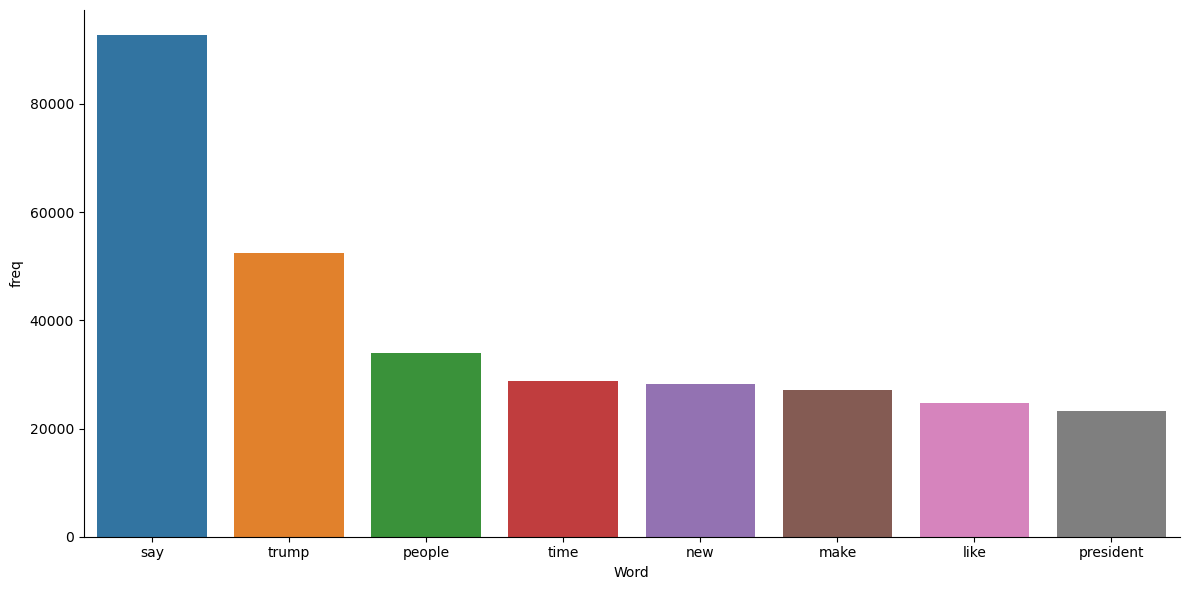

In [85]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=20000] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

# Word Cloud

In [76]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 37852213 words in the combination of all review.


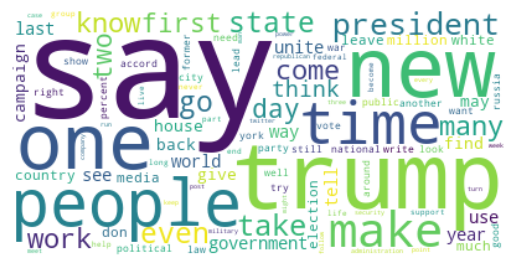

In [77]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis

In [78]:
data

,text
0,house aide even see letter subscribe stump for...
1,ever get feel life roundabout rather straight ...
2,truth might get fire tension intelligence poli...
3,single rate higher engage active combat photo ...
4,print woman six prison revolutionary guard hom...
...,...
18280,rapper unload black meet trump election say ch...
18281,green bay lose week drop vow run table march v...
18282,today grow union several great namesake chain ...
18283,russia hold parallel press russia military hol...


In [79]:
data = data.drop_duplicates('text') 
data

,text
0,house aide even see letter subscribe stump for...
1,ever get feel life roundabout rather straight ...
2,truth might get fire tension intelligence poli...
3,single rate higher engage active combat photo ...
4,print woman six prison revolutionary guard hom...
...,...
18280,rapper unload black meet trump election say ch...
18281,green bay lose week drop vow run table march v...
18282,today grow union several great namesake chain ...
18283,russia hold parallel press russia military hol...


In [80]:
! pip install textblob

You should consider upgrading via the 'C:\Users\Pratiksha\anaconda3\python.exe -m pip install --upgrade pip' command.


In [81]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['text'].apply(pol)
data.head(5)

,text,polarity
0,house aide even see letter subscribe stump for...,0.014649
1,ever get feel life roundabout rather straight ...,0.087111
2,truth might get fire tension intelligence poli...,0.094777
3,single rate higher engage active combat photo ...,0.120933
4,print woman six prison revolutionary guard hom...,-0.012500


In [82]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,house aide even see letter subscribe stump for...,0.014649,Positive
1,ever get feel life roundabout rather straight ...,0.087111,Positive
2,truth might get fire tension intelligence poli...,0.094777,Positive
3,single rate higher engage active combat photo ...,0.120933,Positive
4,print woman six prison revolutionary guard hom...,-0.012500,Negative


<AxesSubplot:>

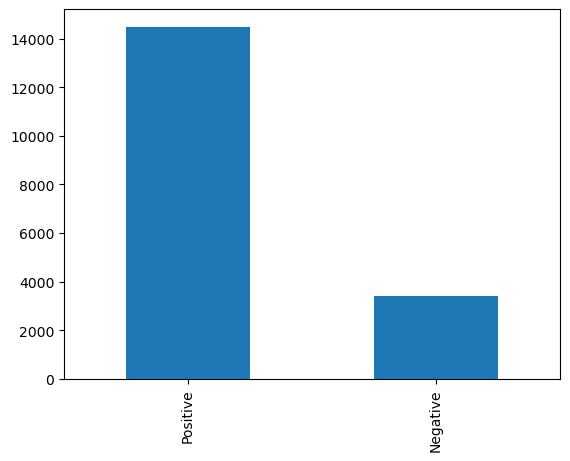

In [83]:
data.Sentiment.value_counts().plot.bar()

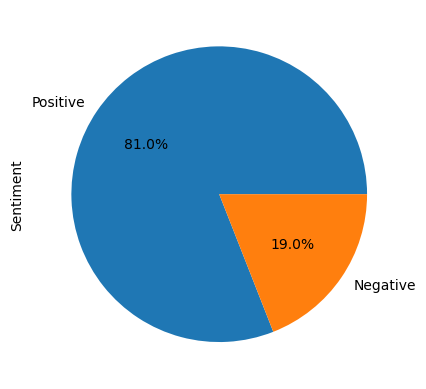

In [84]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");